In [136]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import pickle
plt.style.use('./../../../MW_viz/matplotlib.mplstyle')

from mpl_toolkits.axes_grid1 import make_axes_locatable


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/home/ngc/.local/lib/python3.10/site-packages/IPython/core/magics/pylab.py:166: UserWarning: pylab import has clobbered these variables: ['norm', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [32]:
DATA = "../../data/NICO_PICKLE/"

In [203]:
with open(DATA+'coeffs_0_dict.pickle', 'rb') as f:
    coeffs_0_dict = pickle.load(f)

with open(DATA+'coeffs_1_dict.pickle', 'rb') as f:
    coeffs_1_dict =  pickle.load(f)

with open(DATA+'coeffs_2_dict.pickle', 'rb') as f:
    coeffs_2_dict = pickle.load(f)


with open(DATA+'coefficients_0_symphony.pickle', 'rb') as f:
    coeffs_0_sym = pickle.load(f)

with open(DATA+'coefficients_1_symphony.pickle', 'rb') as f:
    coeffs_1_sym =  pickle.load(f)

with open(DATA+'coefficients_2_symphony.pickle', 'rb') as f:
    coeffs_2_sym = pickle.load(f)

with open(DATA+'merger_ratios.pickle', 'rb') as f:
    merger_ratios =  pickle.load(f)


with open(DATA+'tpericenter.pickle', 'rb') as f:
    tpericenter = pickle.load(f)

with open(DATA+'c_to_a_dict.pickle', 'rb') as f:
    c_to_a_dict = pickle.load(f)

In [ ]:
with open(DATA+'coeffs_1_dict.pickle', 'rb') as f:
    coeffs_1_dict =  pickle.load(f)

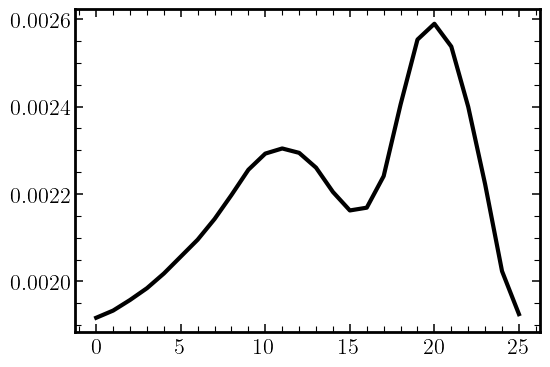

In [34]:
plt.plot(coeffs_0_dict['Halo719'], c='k')
plt.show()

In [43]:
with open('../../data/NICO_PICKLE/times.pickle', 'rb') as f:
    times =  pickle.load(f)
halos = list(times.keys())

In [44]:
with open('../../data/NICO_PICKLE/'+'merger_ratios.pickle', 'rb') as f:
    maratios = pickle.load(f)

mr = np.zeros(18)
i=0
for h in halos:
    mr[i] = maratios[h]
    i+=1

In [45]:
msort_list = list(np.argsort(mr)[::-1])
halos_sort = np.array(halos)[msort_list]

In [55]:
halos_sym = list(coeffs_0_sym.keys())
print(halos_sym)

['Halo023', 'Halo247', 'Halo268', 'Halo364', 'Halo567', 'Halo825', 'Halo926', 'Halo990']


In [ ]:
204-235

In [89]:
times_sym = times['Halo229'][-37:-5]

In [107]:
c_to_a_dict['Halo229'][-19]

0.6444135282455796

In [184]:
P1ngc, P2ngc = np.loadtxt('../../data/gc23_coeff_power.txt')

In [210]:
1.8/14

0.1285714285714286

/tmp/ipykernel_256555/2097123978.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


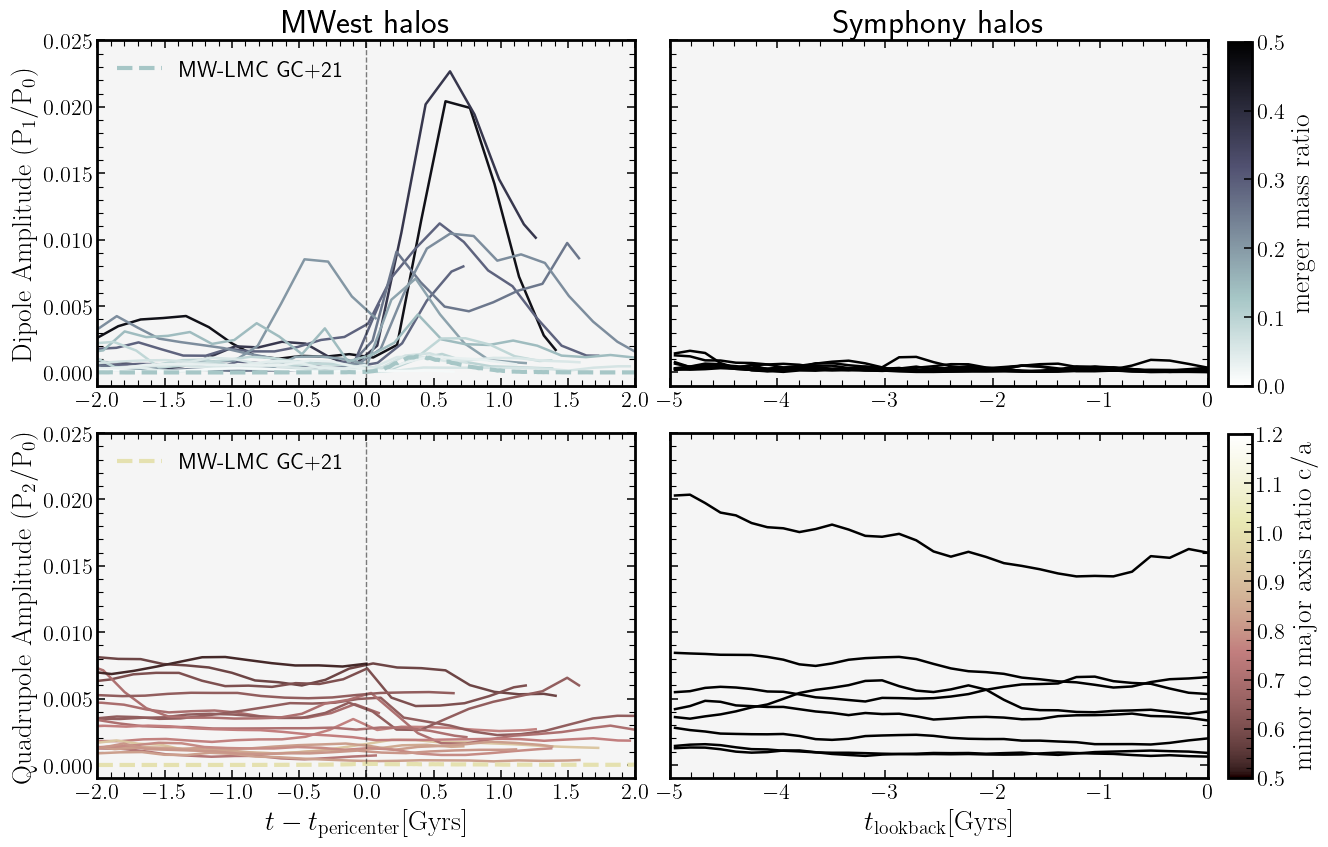

In [257]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8), sharey=True)

norm = mpl.colors.Normalize(vmin=0.5, vmax=1.2)
cmap = plt.cm.ScalarMappable(cmap='pink', norm=norm)


norm2 = mpl.colors.Normalize(vmin=0.0, vmax=0.5)
cmap2 = plt.cm.ScalarMappable(cmap='bone_r', norm=norm2)

for h in halos_sort:
    ax[0][0].plot(times[h]-tpericenter[h], coeffs_1_dict[h]/coeffs_0_dict[h], c=cmap2.to_rgba(merger_ratios[h]), lw=1.8)
    ax[1][0].plot(times[h]-tpericenter[h], coeffs_2_dict[h]/coeffs_0_dict[h], c=cmap.to_rgba(c_to_a_dict[h][-19]), lw=1.8)


for h in halos_sym:
    ax[0][1].plot(times_sym, np.array(coeffs_1_sym[h])/np.array(coeffs_0_sym[h]), c='k', lw=1.8)
    ax[1][1].plot(times_sym, np.array(coeffs_2_sym[h])/np.array(coeffs_0_sym[h]), c='k', lw=1.8)

ax[0][0].plot(np.linspace(-2, 2, 200), P1ngc*1, c=cmap2.to_rgba(1.8/14), label='MW-LMC GC+21', ls='--')
ax[1][0].plot(np.linspace(-2, 2, 200), P2ngc*1, c=cmap.to_rgba(1.0), ls='--', label='MW-LMC GC+21')
ax[0][0].legend(fontsize=16, loc='upper left', frameon=False)
ax[1][0].legend(fontsize=16, loc='upper left', frameon=False)

cax = fig.add_axes([1.0, 0.05, 0.02, 0.43])
cb = fig.colorbar(cmap, cax=cax, orientation='vertical')
cb.set_label(r'$\rm{minor\ to\ major\ axis\ ratio}\ c/a$')


cax = fig.add_axes([1.0, 0.54, 0.02, 0.43])
cb = fig.colorbar(cmap2, cax=cax, orientation='vertical')
cb.set_label(r'$\rm{merger\ mass\ ratio}$')

ax[0][0].set_xlim(-2, 2)
ax[1][0].set_xlim(-2, 2)

ax[0][1].set_xlim(-5, 0)
ax[1][1].set_xlim(-5, 0)

ax[0][0].set_ylim(-0.001, 0.025)
ax[0][1].set_ylim(-0.001, 0.025)



ax[0][0].axvline(0, ls='--', c='k', lw=1.0, alpha=0.5)
ax[1][0].axvline(0, ls='--', c='k', lw=1.0, alpha=0.5)

fig.tight_layout()

plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    right=False,      # ticks along the bottom edge are off
    left=False,         # ticks along the top edge are off
    top=False,
    bottom=False,
    labelbottom=False) #

ax[0][0].set_title("MWest halos")
ax[0][1].set_title("Symphony halos")
ax[0][0].set_ylabel(r"$\rm{Dipole\ Amplitude}\  (P_{1}/P_{0})$")
ax[1][0].set_ylabel(r"$\rm{Quadrupole\ Amplitude}\  (P_{2}/P_{0})$")

ax[1][0].set_xlabel(r"$t-t\rm{_{pericenter}}[Gyrs]$")
ax[1][1].set_xlabel(r"$t\rm{_{lookback}}[Gyrs]$")

ax[1][0].set_facecolor('whitesmoke')
ax[1][1].set_facecolor('whitesmoke')
ax[0][0].set_facecolor('whitesmoke')
ax[0][1].set_facecolor('whitesmoke')


plt.savefig('halos_dipoles_quadrupoles.pdf', bbox_inches='tight')


plt.show()